<a href="https://colab.research.google.com/github/PedroBiel/Mein_Kram/blob/master/CTE_DB_SE_AE_Viento_0_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acción del viento
# según CTE DB-SE-AE 2009

11.03.2020 Pedro Biel

## Librerías
---

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil, log

## Presión dinámica
---

In [0]:
dcc_presion_dinamica = {
    'zonas': ['A', 'B', 'C'],
    'velocidad_básica': [26, 27, 28],
    'presion_dinámica': [0.42, 0.45, 0.52]
}
df_presion_dinamica = pd.DataFrame.from_dict(dcc_presion_dinamica)
df_presion_dinamica

,zonas,velocidad_básica,presion_dinámica
0,A,26,0.42
1,B,27,0.45
2,C,28,0.52


Donde:

- **zonas**: zonas para el valor básico de la velocidad del viento según la figura D.1.
- **velocidad_básica**: velocidad básica del viento según la figura D.1 en $m/s$.
- **presion_dinámica**: valor básico de la presión dinámica en $kN/m^2$.

### Zona

In [0]:
zona = 'B'  # <-- Entrada de datos.
print('Zona:', zona)

Zona: B


### Velocidad básica

In [0]:
vb = df_presion_dinamica['velocidad_básica'].loc[df_presion_dinamica['zonas'] == zona].values.item()
print('vb =', vb, 'm/s')

vb = 27 m/s


### Presión dinámica

In [0]:
qb = df_presion_dinamica['presion_dinámica'].loc[df_presion_dinamica['zonas'] == zona].values.item()
print('qb =', qb, 'kN/m²')

qb = 0.45 kN/m²


## Periodo de retorno
---

In [0]:
dcc_periodo_retorno = {
    'periodo_retorno': [1, 2, 5, 10, 20, 50, 200],
    'coeficiente_corrector': [0.41, 0.78, 0.85, 0.90, 0.95, 1.00, 1.08]
}
df_periodo_retorno = pd.DataFrame.from_dict(dcc_periodo_retorno)
df_periodo_retorno

,periodo_retorno,coeficiente_corrector
0,1,0.41
1,2,0.78
2,5,0.85
3,10,0.90
4,20,0.95
5,50,1.00
6,200,1.08


Donde:

- **periodo_retorno**: periodo de retorno en años según la tabla D.1.
- **coeficiente_corrector**: coeficiente corrector según el preiodo de retorno.

### Periodo de retorno

In [0]:
pr = 50  # años. <-- Entrada de datos.
print('Perido de retorno de', pr, 'años.')

Perido de retorno de 50 años.


In [0]:
cc = df_periodo_retorno['coeficiente_corrector'].loc[
    df_periodo_retorno['periodo_retorno'] == pr
    ].values.item()
print('Coeficiente corrector =', cc)

Coeficiente corrector = 1.0


## Coeficiente de exposición
---

In [0]:
dcc_coeficientes_entorno = {
    'grados': ['I', 'II', 'III', 'IV', 'V'],
    'k': [0.156, 0.17, 0.19, 0.22, 0.24],
    'L': [0.003, 0.01, 0.05, 0.3, 1.0],
    'Z': [1., 1., 2., 5., 10.]
}
df_coeficientes_entorno = pd.DataFrame.from_dict(dcc_coeficientes_entorno)
df_coeficientes_entorno

,grados,k,L,Z
0,I,0.156,0.003,1.0
1,II,0.170,0.010,1.0
2,III,0.190,0.050,2.0
3,IV,0.220,0.300,5.0
4,V,0.240,1.000,10.0


Donde:

- **grados**: grados de aspereza del entorno según la tabla D.2.
- **k**: parámetro característico de cada tipo de entorno según la tabla D.2.
- **L**: parámetro característico de cada tipo de entorno según la tabla D.2 en $m$.
- **Z**: parámetro característico de cada tipo de entorno según la tabla D.2 en $m$.

Los grados de asperza de dividen en:

| Grado | Deficición |
| ----- | ---------- |
| **I** | Borde del mar o de un lago, con una superficie de agua en la dirección del viento de al menos 5 km de longitud. |
| **II** | Terreno rural llano sin obstáculos ni arbolado de importancia. |
| **III** | Zona rural accidentada o llana con algunos obstáculos aislados, como árboles o construcciones pequeñas. |
| **IV** | Zona urbana en general, industrial o forestal. |
| **V** | Centro de negocios de grandes ciudades, con profusión de edificios en altura. |

### Grado de aspereza

In [0]:
grado = 'I'  # <-- Entrada de datos.
print('Grado de aspereza =', grado)

Grado de aspereza = I


### Parámetro k

In [0]:
k = df_coeficientes_entorno['k'].loc[df_coeficientes_entorno['grados'] == grado].values.item()
print('k =', k)

k = 0.156


### Parámetro L

In [0]:
L = df_coeficientes_entorno['L'].loc[df_coeficientes_entorno['grados'] == grado].values.item()
print('L =', L, 'm')

L = 0.003 m


### Parámetro Z

In [0]:
Z = df_coeficientes_entorno['Z'].loc[df_coeficientes_entorno['grados'] == grado].values.item()
print('Z =', Z, 'm')

Z = 1.0 m


### Altura sobre el terreno $z$ < 200 $m$

In [0]:
z = np.arange(start=0, stop=200, step=1)
print('Altura sobre el terreno en los primeros 10 m =', z[:11], ' m')

Altura sobre el terreno en los primeros 10 m = [ 0  1  2  3  4  5  6  7  8  9 10]  m


### Coeficiente de exposición

$$c_e = F · (F + 7 · k)$$
$$F = k · \ln(\max(z, Z) / L)$$

In [0]:
max_z = np.array([max(i, Z) for i in z])
F = k * np.log(max_z / L)
ce = F * (F + 7 * k)
print('Coeficiente de exposición en los primeros 30 m cada 5 m =')
print(ce[0:31:5])

Coeficiente de exposición en los primeros 30 m cada 5 m =
[1.81084525 2.60311019 2.98316113 3.21631712 3.38659667 3.52144975
 3.63343178]


## Presión estática
---

$$q_e = q_b · c_e · c_p · \text{coeficiente corrector}$$

Donde:

- $q_e$: presión estática en $kN/m²$.
- $c_p$: coeficiente eólico que no es objeto de estudio en este documento. Se considerará $c_p$ = 1.


In [0]:
df = pd.DataFrame()
df['$z$'] = z
df['$q_b$'] = qb
df['$c_e$'] = np.around(ce, decimals=3)
df['$c_p$'] = 1
df['$cc$'] = cc
df['$q_e$'] = np.around(qb * ce * df['$c_p$'] * cc, decimals=2)
qer = df['$q_e$'].loc[df['$z$'] == 10].values.item()
df['$r$'] = np.around(df['$q_e$'] / qer, decimals=2)
df.sample(5)

,$z$,$q_b$,$c_e$,$c_p$,$cc$,$q_e$,$r$
69,69,0.45,4.166,1,1.0,1.87,1.40
97,97,0.45,4.393,1,1.0,1.98,1.48
27,27,0.45,3.569,1,1.0,1.61,1.20
185,185,0.45,4.839,1,1.0,2.18,1.63
50,50,0.45,3.956,1,1.0,1.78,1.33


In [0]:
z_min = 0  # [m]  <-- Entrada de datos.
z_max = 30  # [m]  <-- Entrada de datos.
z_paso = 5  # [m]  <-- Entrada de datos.
df_qe = df.loc[z_min:z_max].where(df['$z$'] % z_paso == 0).dropna()
df_qe

,$z$,$q_b$,$c_e$,$c_p$,$cc$,$q_e$,$r$
0,0.0,0.45,1.811,1.0,1.0,0.81,0.60
5,5.0,0.45,2.603,1.0,1.0,1.17,0.87
10,10.0,0.45,2.983,1.0,1.0,1.34,1.00
15,15.0,0.45,3.216,1.0,1.0,1.45,1.08
20,20.0,0.45,3.387,1.0,1.0,1.52,1.13
25,25.0,0.45,3.521,1.0,1.0,1.58,1.18
30,30.0,0.45,3.633,1.0,1.0,1.64,1.22


Donde:

- $z$: altura sobre el terreno en $m$.
- $q_b$: valor básico de la presión dinámica en $kN/m²$.
- $c_e$: coeficiente de exposición.
- $c_e$: coeficiente eólico.
- $q_e$: presión estática en $kN/m²$.
- $r$: relación de presiones estáticas con respecto a $q_e (z = 10 \text{ m})$.

### Gráfica

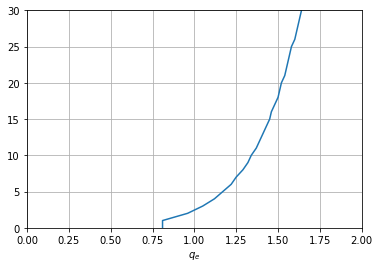

In [0]:
x_max = df['$q_e$'].loc[df['$z$'] == z_max].values.item()
x_max = ceil(x_max)
xlim=[0, x_max]
ylim=[0, z_max]
df.plot(kind='line', x='$q_e$', y='$z$', xlim=xlim, ylim=ylim, legend=False, grid=True)
plt.show()

## Versión
---

In [0]:
%load_ext version_information
%version_information matplotlib, numpy, pandas

ModuleNotFoundError: ignored